In [12]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd
import os


In [13]:
df = pd.read_csv("153腕データ.csv")

df = pd.DataFrame(df)
display(df[df.columns[0]])

0          0
1         33
2         67
3        100
4        133
       ...  
456    15215
457    15249
458    15282
459    15315
460    15349
Name: Time (ms), Length: 461, dtype: int64

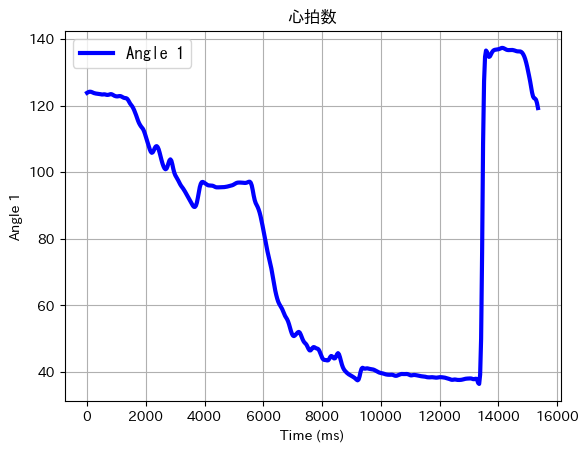

In [14]:
time = 0
data_number = 1

#display(df)

save_flg=1
X = df[df.columns[0]]
Y = df[df.columns[1]]
#変数の間
color="#0000FF"
title = '心拍数'#df.columns[data_number]

xlabel = df.columns[time]
ylabel = df.columns[data_number]
font_size = 12
font_family = 'MS Gothic'
figsize = (16,4)#(20,6)
line_width = 3
rotation = 0

#x軸は時間なので固定
x_axis = X
#変化するのはY軸
y_axis = Y

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.xlim()
plt.ylim()#心拍数の場合、数値の範囲を限定：(60,120)

plt.rcParams["font.size"] = font_size
plt.rcParams["font.family"] = font_family
plt.rcParams["figure.figsize"] = figsize

plt.xticks(rotation=rotation)

plt.plot(x_axis,y_axis,color=color,label=ylabel,linewidth=line_width)
plt.legend(ncol=1)
plt.grid()

In [23]:
#同一フォルダ内のcsvファイルの名前を取得
def get_csv_files_in_same_folder(path):

    # 現在のノートブックのディレクトリを取得 
    notebook_directory = os.path.dirname(os.path.abspath(path))
    # フォルダ内のファイル一覧を取得
    files = os.listdir(notebook_directory)

    # CSVファイルのみを抽出
    csv_files = [file for file in files if file.endswith(".csv")]

    return csv_files

def read_csv(csv_files_list):

    # ファイル名を保存する配列を作成（最低限の大きさで初期化）
    file_names_array = [None] * len(csv_files_list)

    # 配列にファイル名を格納
    for i, csv_file in enumerate(csv_files_list):
        file_names_array[i] = csv_file
    
    #csvの読込み
    read_df = [0]*len(file_names_array)
    for i in range(len(file_names_array)):
        read_df[i] = pd.read_csv(file_names_array[i])

#y_lineをカラム数でループしてcsvデータをすべてプロットする.
def ploter(df,x_line=0,y_line=1,hit_flag=False):
    #変数の間
    hit_color="#0000FF"
    no_hit_color="#FF0000"
    font_size = 12
    font_family = 'MS Gothic'
    figsize = (16,4)
    line_width = 2 
    rotation = 0

    hit_flag = True#df[df.columns[3]]


    title = df.columns[data_number]
    xlabel = "Time(sec)"
    ylabel = df.columns[data_number]

    x_axis = df[df.columns[x_line]] / 1000
    y_axis = df[df.columns[y_line]]

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)

    plt.xlim()
    plt.ylim()#心拍数の場合、数値の範囲を限定：(60,120)

    plt.rcParams["font.size"] = font_size
    plt.rcParams["font.family"] = font_family
    plt.rcParams["figure.figsize"] = figsize

    #当たった場合:True
    if hit_flag == True:
        #外れた時のグラフ
        plt.plot(x_axis,y_axis,color=hit_color)
    elif hit_flag == False:
        #当たった時のグラフ
        plt.plot(x_axis,y_axis,color=no_hit_color,label=ylabel,linewidth=line_width)
    else:
        print("plot errer")

    plt.legend(ncol=1)
    plt.grid()
    plt.show()

In [29]:
path = r"C:\Users\ginnt\デスクトップ\kinovea解析"

csv_files_list = get_csv_files_in_same_folder(path)
print(csv_files_list)
df_ = read_csv(csv_files_list)
print(df)
ploter(df,x_line=0,y_line=1,hit_flag=False)

[]
[]


AttributeError: 'list' object has no attribute 'columns'

In [27]:
i
#　csv_recod_data_ploter(データフレーム,レコード番地,グラフタイトル,画像の保存)
def csv_recod_data_ploter(df,record=2,title='Default',save_flg=False):

    #変数
    color="#0000FF"
    title = title

    xlabel = df.columns[0]
    ylabel = df.columns[record]
    font_size = 14
    font_family = 'MS Gothic'
    figsize = (18,6)
    line_width = 2
    rotation = 0
    
    #x軸は固定
    x_axis = df[df.columns[0]]
    #変化するのはY軸
    y_axis = df[df.columns[record]]

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.xlim()
    plt.ylim()

    plt.rcParams["font.size"] = font_size
    plt.rcParams["font.family"] = font_family
    plt.rcParams["figure.figsize"] = figsize

    plt.xticks(rotation=rotation)

    plt.plot(x_axis,y_axis,color=color,label=ylabel,linewidth=line_width)
    plt.legend(ncol=1)
    plt.grid()
    #プロットした画像を保存する
    if save_flg == True:
        plt.savefig(str(df.columns) + ".jpg")
    plt.show()

#メイン処理
# CSVファイルの一覧を取得
csv_files_list = get_csv_files_in_same_folder(FOLDER_ADDRESS)

#csvファイルのpandasを利用した読込み
csv_df = read_csv(csv_files_list)

df = csv_df#[0]
#csv_recod_data_ploter(df,2,"test",save_flg=False)
csv_file_number = 0
csv_columns_number = 2
csv_recod_number = 0

#csvファイルの個数
print("csvファイルの個数")
csv_file_number_scale = len(csv_df)
#データフレームのカラム数
print("データフレームのカラム数")
csv_columns_number_scale = len(df.columns)
#データフレームのレコード数

print("csv_file_number_scale:" + str(csv_file_number_scale))
print("csv_columns_number_scale:" + str(csv_columns_number_scale))

debug_total_loop = 0
while csv_file_number < csv_file_number_scale:
    #csvファイルを読み込む
    df = csv_df[csv_file_number]
    #ファイル内のデータフレームのカラム数を取得
    csv_columns_number_scale = len(df.columns)

    #カラム数よりループ回数が少ない場合:True 
    while csv_columns_number < csv_columns_number_scale:
         #　csv_recod_data_ploter(データフレーム,レコード番地,グラフタイトル,画像の保存)
         csv_recod_data_ploter(df,record=csv_columns_number,title=df.columns[csv_columns_number],save_flg=False)
         
         csv_columns_number += 1
         debug_total_loop += 1
         print(debug_total_loop)

    csv_columns_number = 2
    csv_file_number +=1
print("END")

csvファイルの個数
データフレームのカラム数


AttributeError: 'list' object has no attribute 'columns'